### HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
# Load Train Dataset

y = pd.read_csv("./data/Train-1542865627584.csv")
Train_Beneficiarydata = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

y_test = pd.read_csv("./data/Test-1542969243754.csv")
Test_Beneficiarydata = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")


,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [5]:
# Check Shape of datasets 

print('Shape of Train data :',y.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',y_test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [24]:
#Check missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()

Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [25]:
#Check missing values in each column in inpatient data :

Train_Inpatientdata.isna().sum()

Train_Inpatientdata.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [26]:
#Check missing values in each column in outpatient data :

Train_Outpatientdata.isna().sum()

Train_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [13]:
# Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

print("Unique values in ChronicCond_Alzheimer column: ", format(Train_Beneficiarydata['ChronicCond_Alzheimer'].unique()))

Train_Beneficiarydata = Train_Beneficiarydata.replace({'Gender': 2, 'ChronicCond_Depression': 2, 'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'ChronicCond_KidneyDisease': 2, 'ChronicCond_Alzheimer': 2,
                'ChronicCond_Heartfailure': 2, 'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2}, 0)


Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)



Unique values in ChronicCond_Alzheimer column:  [1 0]


In [15]:
# data cleaning changing Y values of RenalDiseaseIndicator to 1 to make it uniform

print("Unique values in RenalDiseaseIndicator column: ", format(Train_Beneficiarydata['RenalDiseaseIndicator'].unique()))

print("Unique values in RenalDiseaseIndicator column: ", format(Test_Beneficiarydata['RenalDiseaseIndicator'].unique()))

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})


Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Unique values in RenalDiseaseIndicator column:  [0 1]
Unique values in RenalDiseaseIndicator column:  ['0' 1]


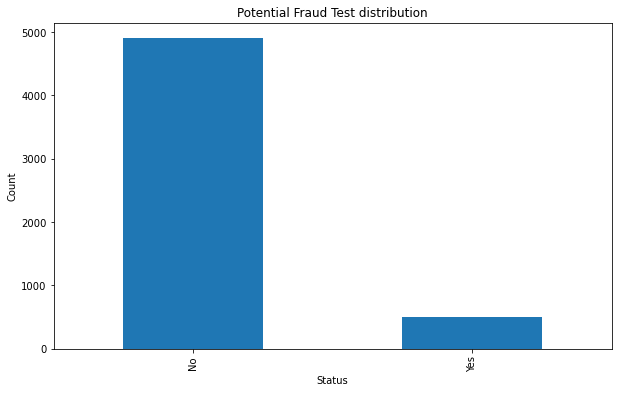

In [8]:
# Potential fraud test distrubution

plt.title("Potential Fraud Test distribution")
y.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Adding features and combine datasets

In [17]:
Train_Beneficiarydata['DOD'].unique()

# Add Flag column 'WhetherDead' using DOD values to know whether beneficiary is dead on not

Train_Beneficiarydata['WhetherDead'] = 0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(), 'WhetherDead'] = 1

Train_Beneficiarydata['WhetherDead'].head(3)

Test_Beneficiarydata['WhetherDead'] = 0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(), 'WhetherDead'] = 1

Test_Beneficiarydata['WhetherDead'].head(3)

0    0
1    1
2    0
Name: WhetherDead, dtype: int64

In [10]:
# Adding Target numeric variable.

y["target"] = np.where(y.PotentialFraud == "Yes", 1, 0) 

y

,Provider,PotentialFraud,target
0,PRV51001,No,0
1,PRV51003,Yes,1
2,PRV51004,No,0
3,PRV51005,Yes,1
4,PRV51007,No,0
...,...,...,...
5405,PRV57759,No,0
5406,PRV57760,No,0
5407,PRV57761,No,0
5408,PRV57762,No,0


In [18]:
# Combine Inpatient and Outpatient datasets for both train and test

train_medicare = pd.merge(Train_Inpatientdata, Train_Outpatientdata, left_on= [ x for x in Train_Outpatientdata.columns if x in Train_Inpatientdata.columns], right_on = [ x for x in Train_Outpatientdata.columns if x in Train_Inpatientdata.columns], how = 'outer')

test_medicare = pd.merge(Test_Inpatientdata, Test_Outpatientdata, left_on= [ x for x in Test_Outpatientdata.columns if x in Test_Inpatientdata.columns], right_on = [ x for x in Test_Outpatientdata.columns if x in Test_Inpatientdata.columns], how = 'outer')


In [20]:
# Print shape of data 

print('All Patient Data Train : ',train_medicare.shape)
train_medicare.head()

print('All Patient Data Test : ',test_medicare.shape)
test_medicare.head(2)

All Patient Data Train :  (558211, 30)
All Patient Data Test :  (135392, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN


In [22]:
# combine benefeciary data with medicare data for patient information

train_data = pd.merge(train_medicare, Train_Beneficiarydata, left_on='BeneID', right_on='BeneID', how= 'inner')

test_data = pd.merge(test_medicare, Test_Beneficiarydata, left_on='BeneID', right_on='BeneID', how= 'inner')


In [23]:
# Print shape of data 
print('Shape of All Patient Details Train : ',train_data.shape)
train_data.head()

print('Shape of All Patient Details Test : ',test_data.shape)
test_data.head(2)

Shape of All Patient Details Train :  (558211, 55)
Shape of All Patient Details Test :  (135392, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,0,1,0,0,0,21260,2136,120,100,0
1,BENE11014,CLM731858,2009-12-16,2009-12-16,PRV56558,60,PHY331420,PHY331420,PHY428520,NaN,...,0,1,0,0,0,21260,2136,120,100,0


In [29]:
# check missing value percentage in full datasets

print('Percent missing values in Train Provider with patient details data :\n')
print(train_data.isnull().sum()*100/len(train_data))


Percent missing values in Train Provider with patient details data :

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnos

In [30]:
print('Percent missing values in Test Provider with patient details data :\n')
test_data.isnull().sum()*100/len(test_data)

Percent missing values in Test Provider with patient details data :



BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                